In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import STL

## Data Exploration od Data Provided By ExcelR

In [2]:
gold_prices_excelR = pd.read_csv(r"C:\radha\GitHub\Gold-Price-Prediction\Gold_data_Excel.csv")
gold_prices_excelR.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [3]:
gold_prices_excelR.tail()

,date,price
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


In [4]:
gold_prices_excelR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [5]:
gold_prices_excelR['date'] = pd.to_datetime(gold_prices_excelR['date'])

In [6]:
gold_prices_excelR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [7]:
gold_prices_excelR.index = gold_prices_excelR['date']
gold_prices_excelR.drop('date',axis=1,inplace=True)

In [8]:
gold_prices_excelR.isnull().sum()

price    0
dtype: int64

## EDA 

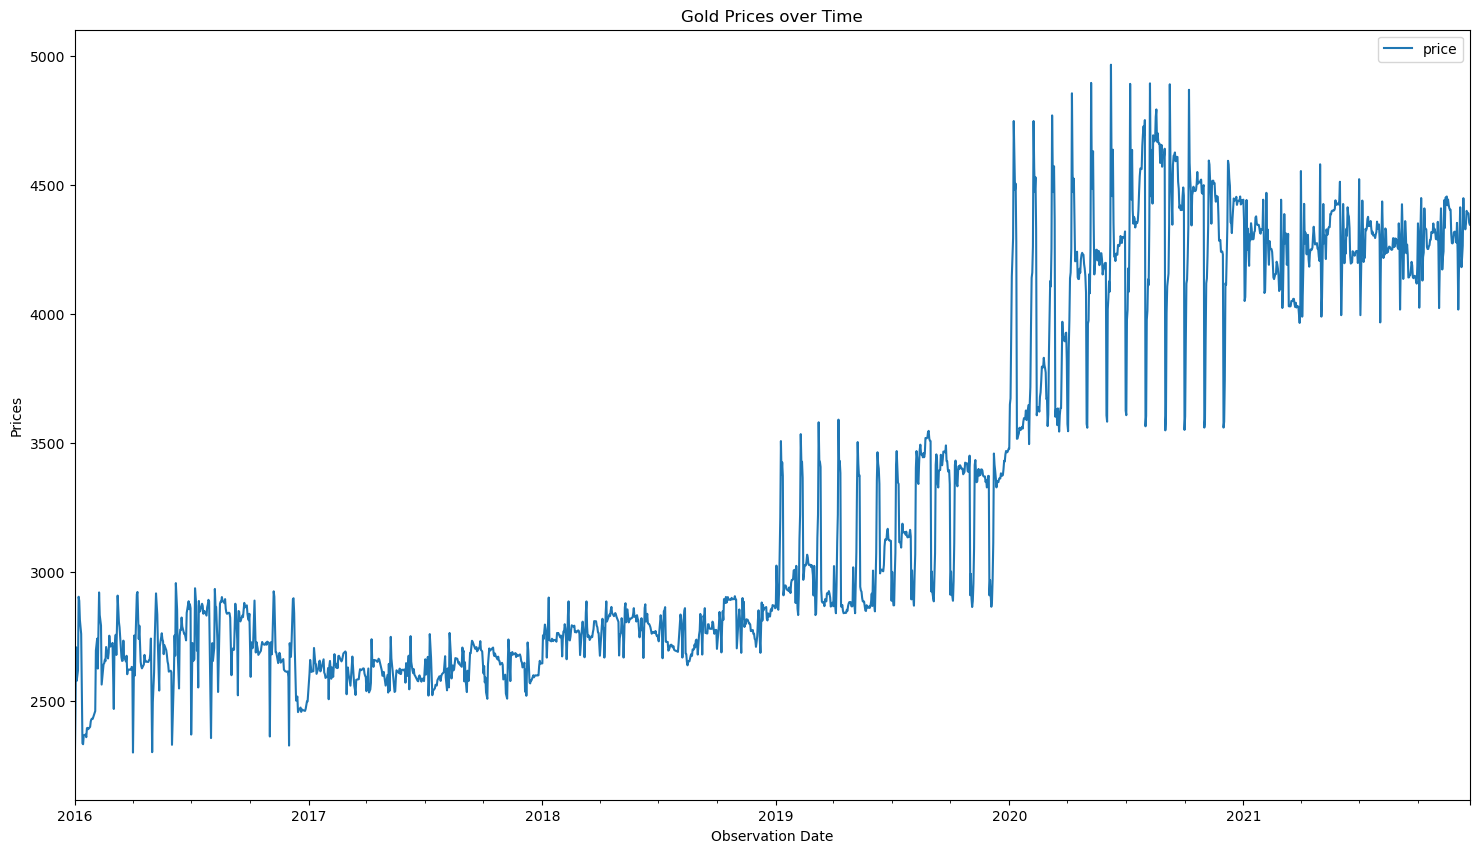

In [9]:
gold_prices_excelR.plot(figsize = (18,10))
plt.xlabel("Observation Date")
plt.ylabel("Prices")
plt.title("Gold Prices over Time")
plt.show()

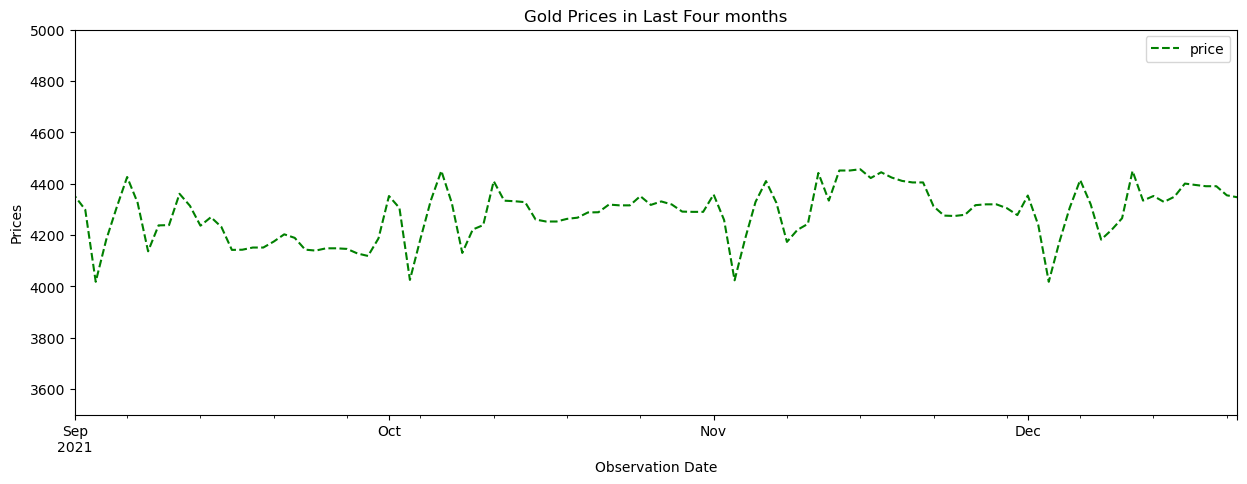

In [10]:
gold_prices_excelR.plot(xlim = ['2021-09-01','2021-12-21'],ls='--', c='g',ylim = [3500,5000],figsize = (15,5))
plt.xlabel("Observation Date")
plt.ylabel("Prices")
plt.title("Gold Prices in Last Four months")
plt.show()

In [11]:
last_4month_index = gold_prices_excelR.loc['2021-09-01':'2021-12-21'].index
last_4month_price = gold_prices_excelR.loc['2021-09-01':'2021-12-21']['price']

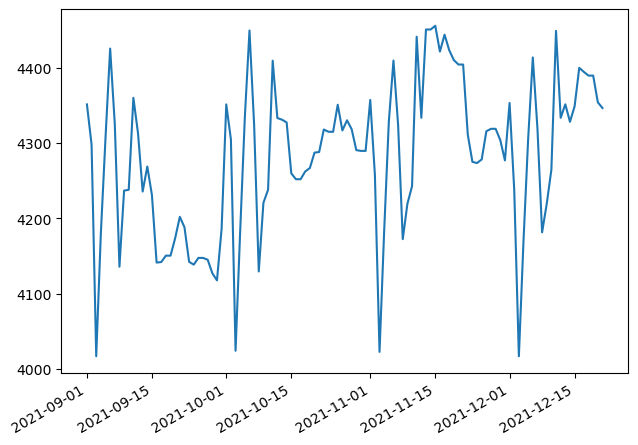

In [12]:
figure,ax = plt.subplots() ## we can not specify the figure size in subplots because fig may get dist
plt.tight_layout()
figure.autofmt_xdate()
ax.plot(last_4month_index,last_4month_price)
plt.show()

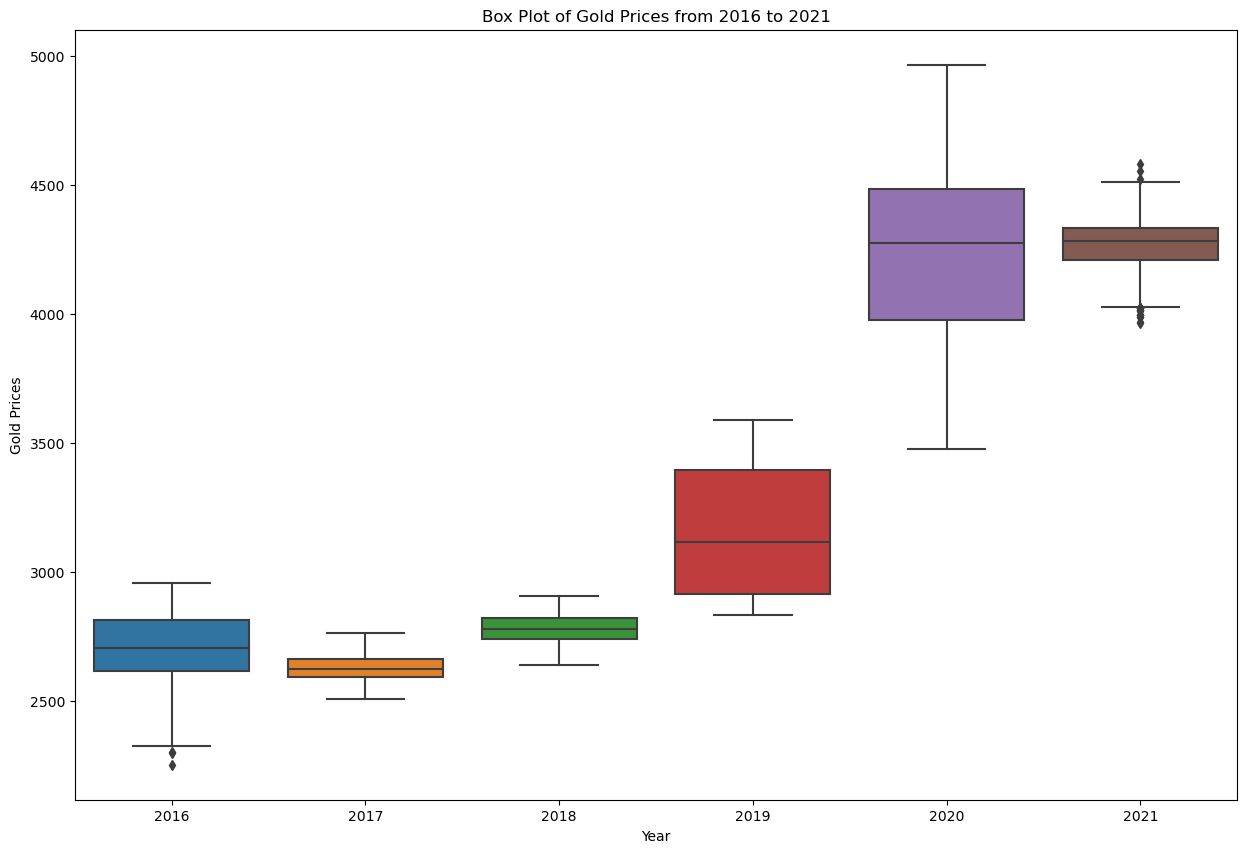

In [13]:
_,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x=gold_prices_excelR.index.year, y = gold_prices_excelR.price,ax=ax)
plt.title("Box Plot of Gold Prices from 2016 to 2021")
plt.xlabel("Year")
plt.ylabel("Gold Prices")
plt.show()

## Resampling the Data 

+ Annual Fluction for maximum, minimum and mean gold price

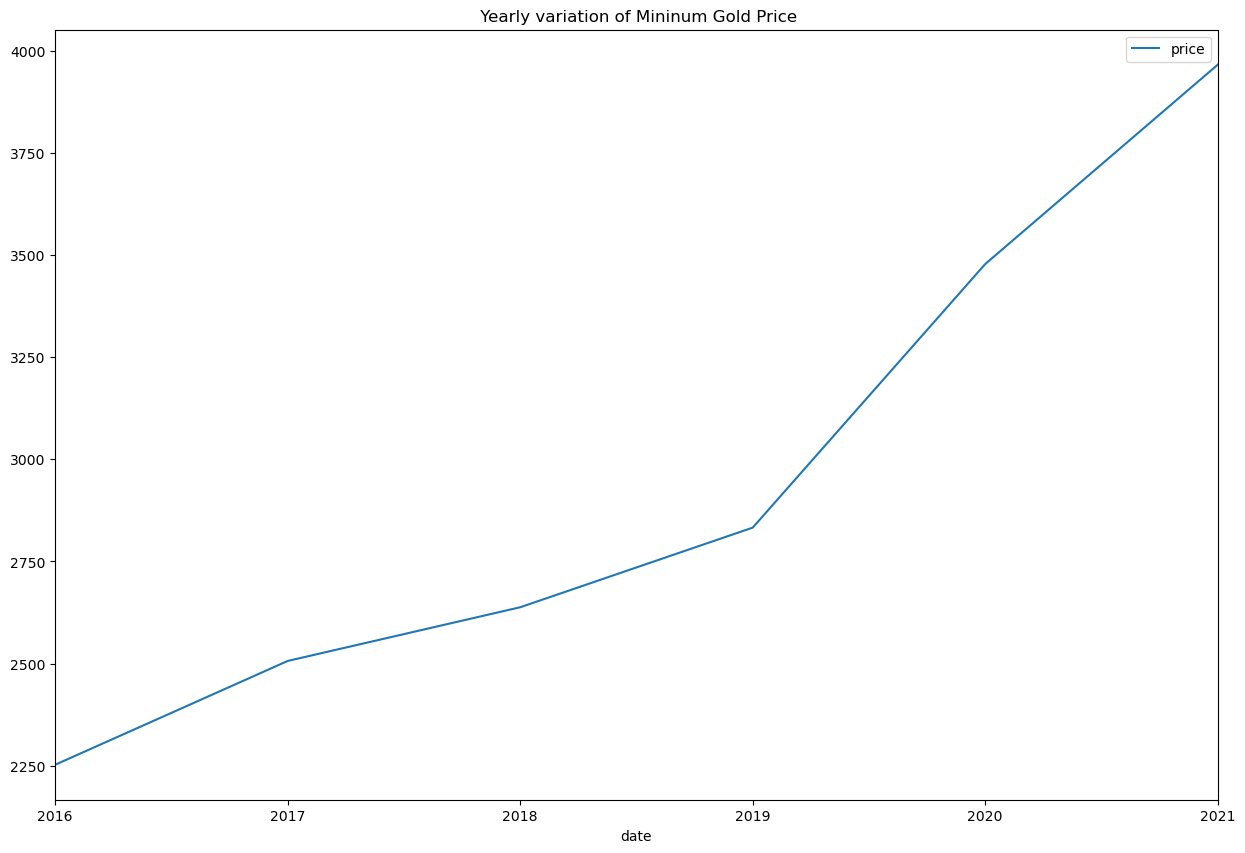

In [14]:
gold_prices_excelR.resample('A').min().plot(figsize=(15,10))
plt.title(" Yearly variation of Mininum Gold Price")
plt.show()

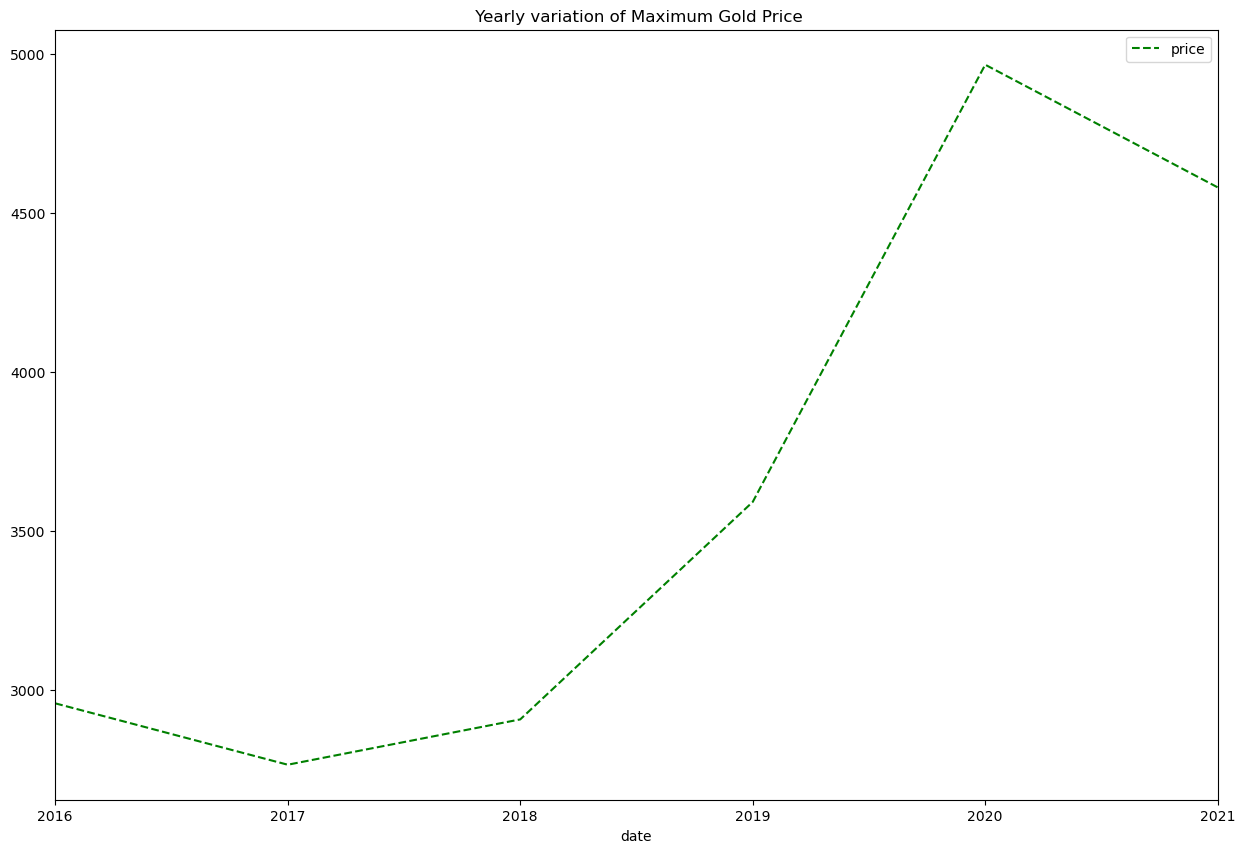

In [16]:
gold_prices_excelR.resample('A').max().plot(figsize=(15,10),ls='--',c='g')
plt.title(" Yearly variation of Maximum Gold Price")
plt.show()

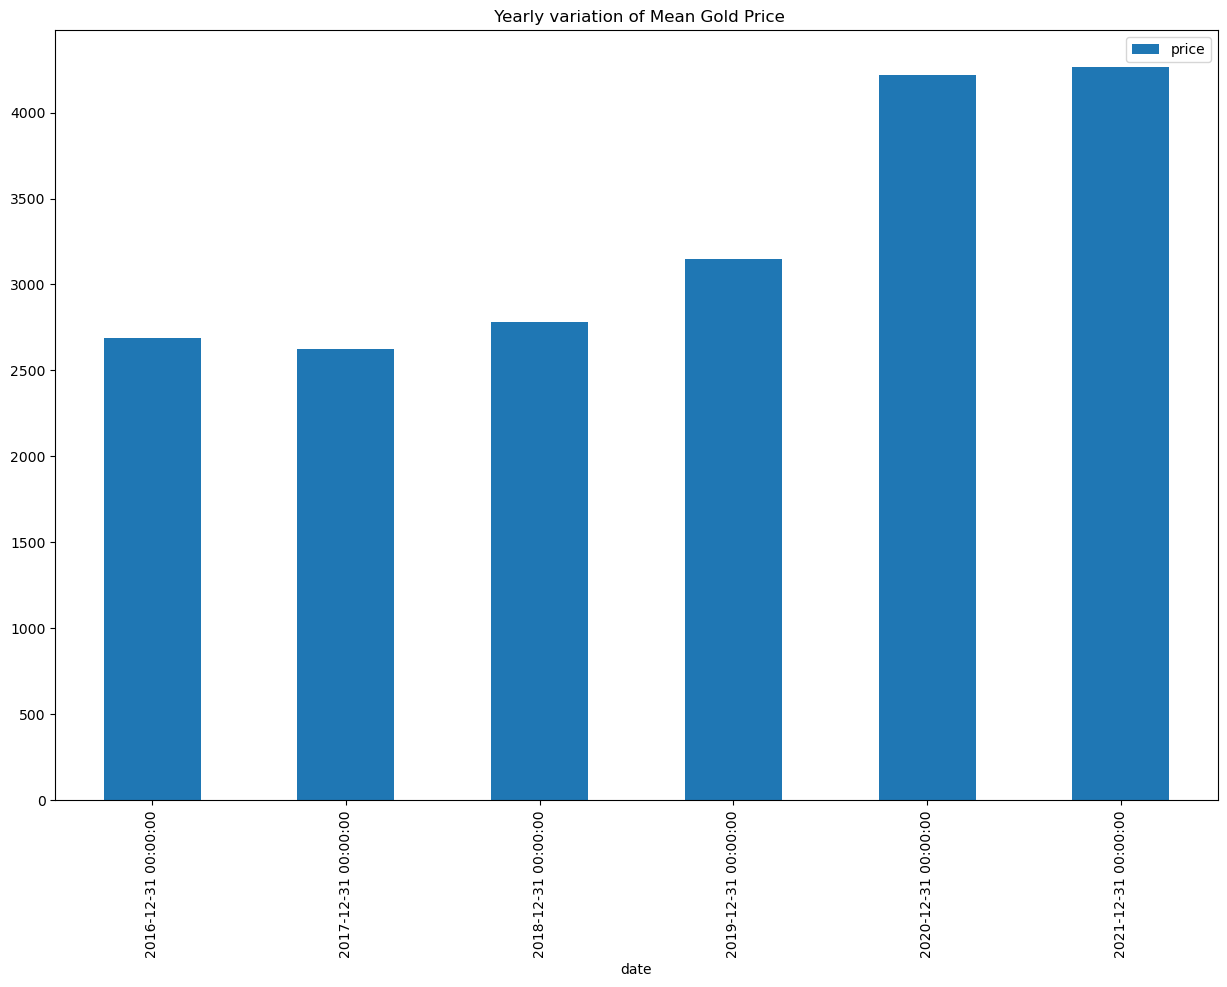

In [17]:
gold_prices_excelR.resample('A').mean().plot(figsize=(15,10),kind = 'bar')
plt.title(" Yearly variation of Mean Gold Price")
plt.show()

+ Variation minimum, maximum, mean gold price at Quarter start

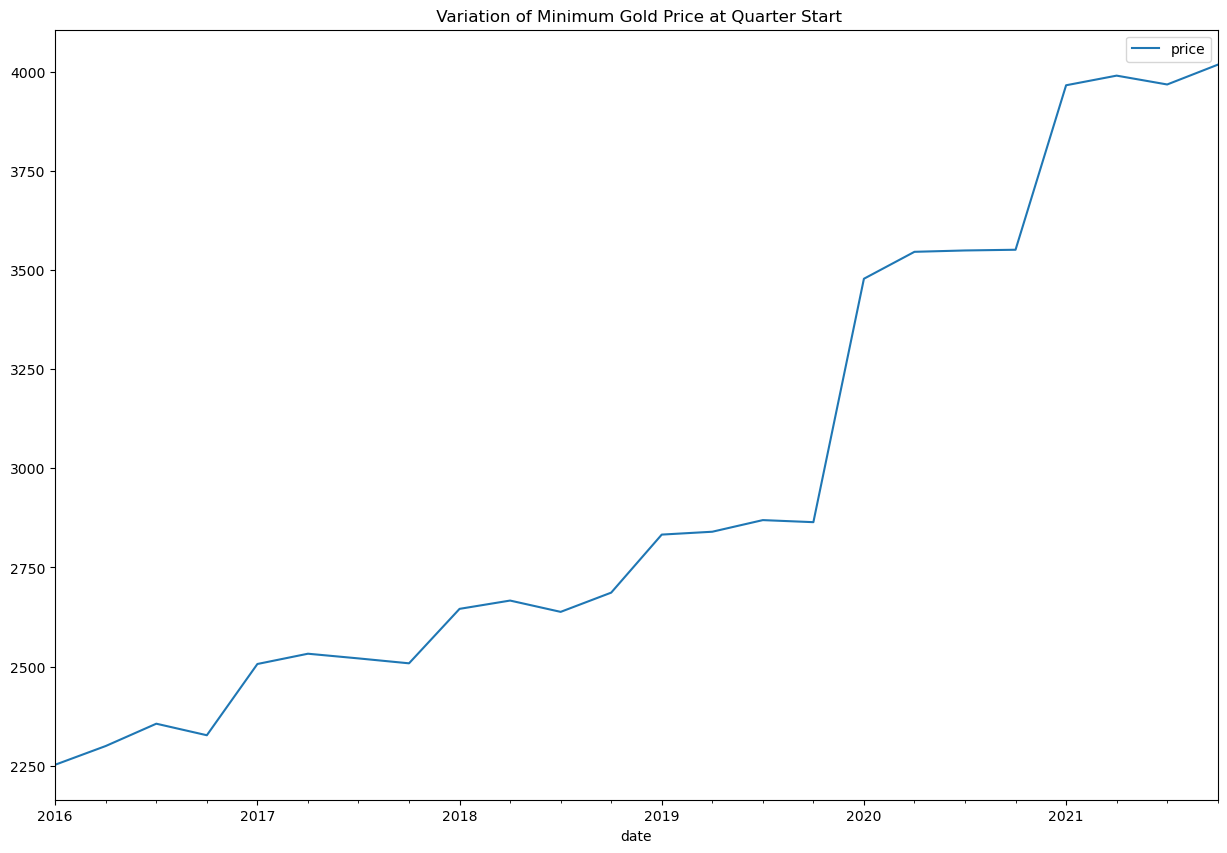

In [18]:
gold_prices_excelR.resample('Qs').min().plot(figsize=(15,10))
plt.title(" Variation of Minimum Gold Price at Quarter Start")
plt.show()

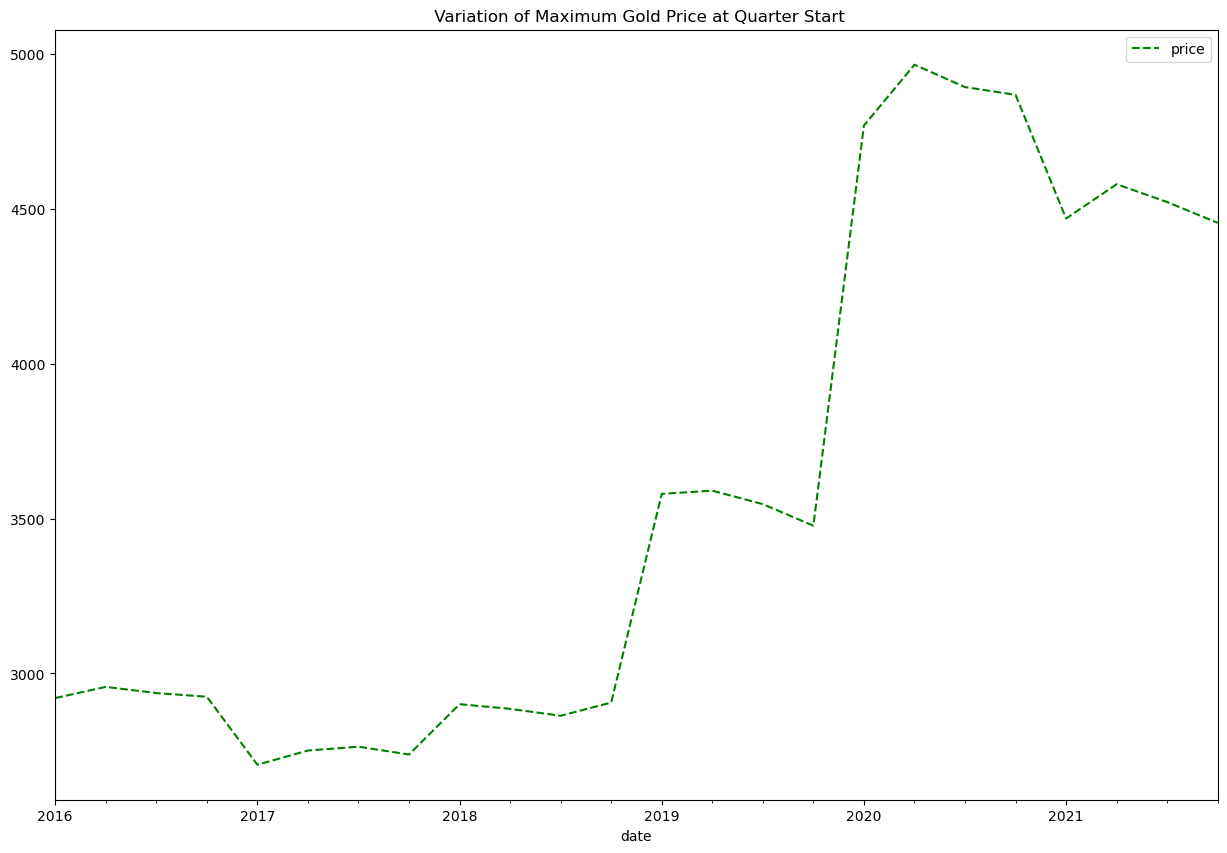

In [19]:
gold_prices_excelR.resample('Qs').max().plot(figsize=(15,10),ls='--',c='g')
plt.title(" Variation of Maximum Gold Price at Quarter Start")
plt.show()

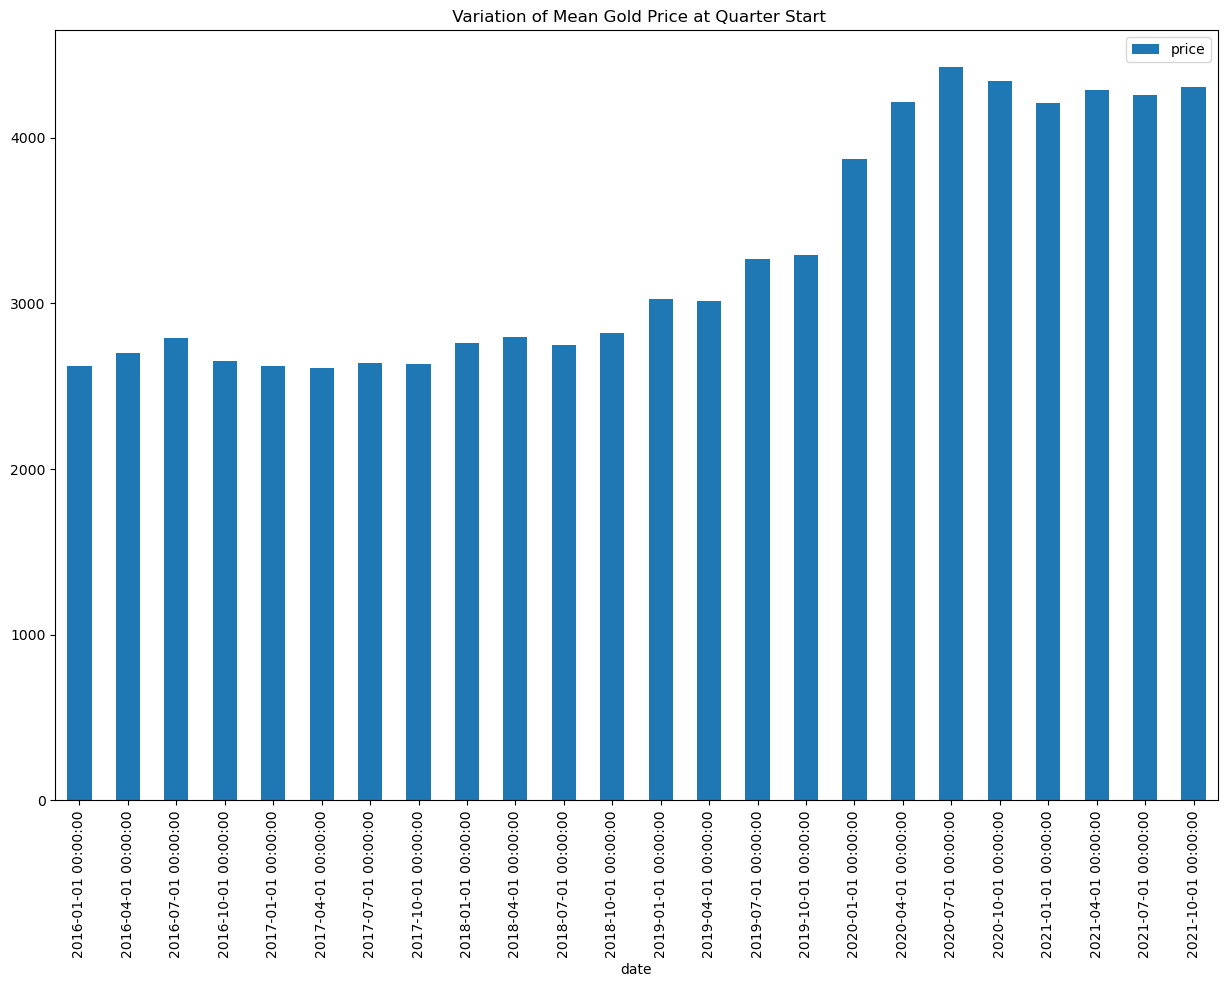

In [20]:
gold_prices_excelR.resample('Qs').mean().plot(figsize=(15,10),kind = 'bar')
plt.title(" Variation of Mean Gold Price at Quarter Start")
plt.show()

## Minimum, maximum and mean Gold price for the year upto date when businees ended for the year

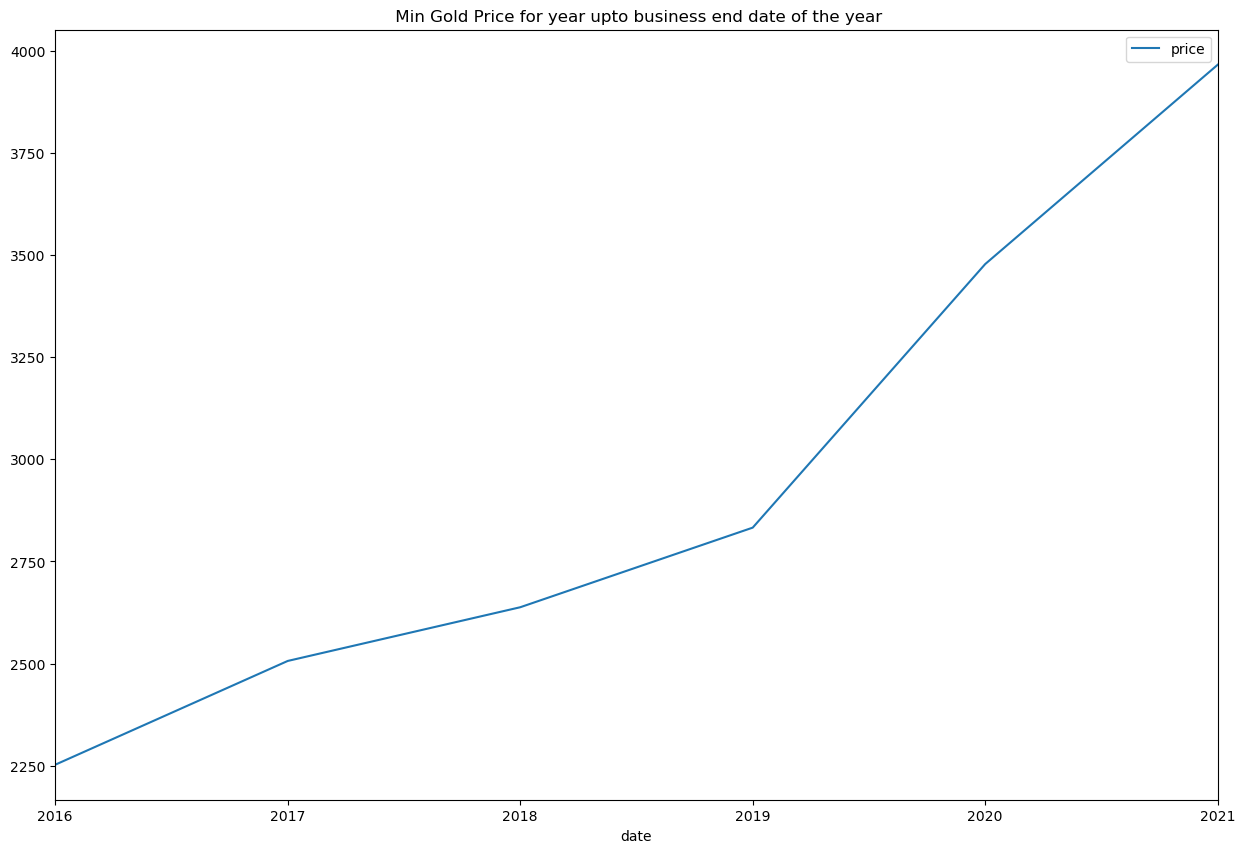

In [21]:
gold_prices_excelR.resample('BA').min().plot(figsize=(15,10))
plt.title(" Min Gold Price for year upto business end date of the year")
plt.show()

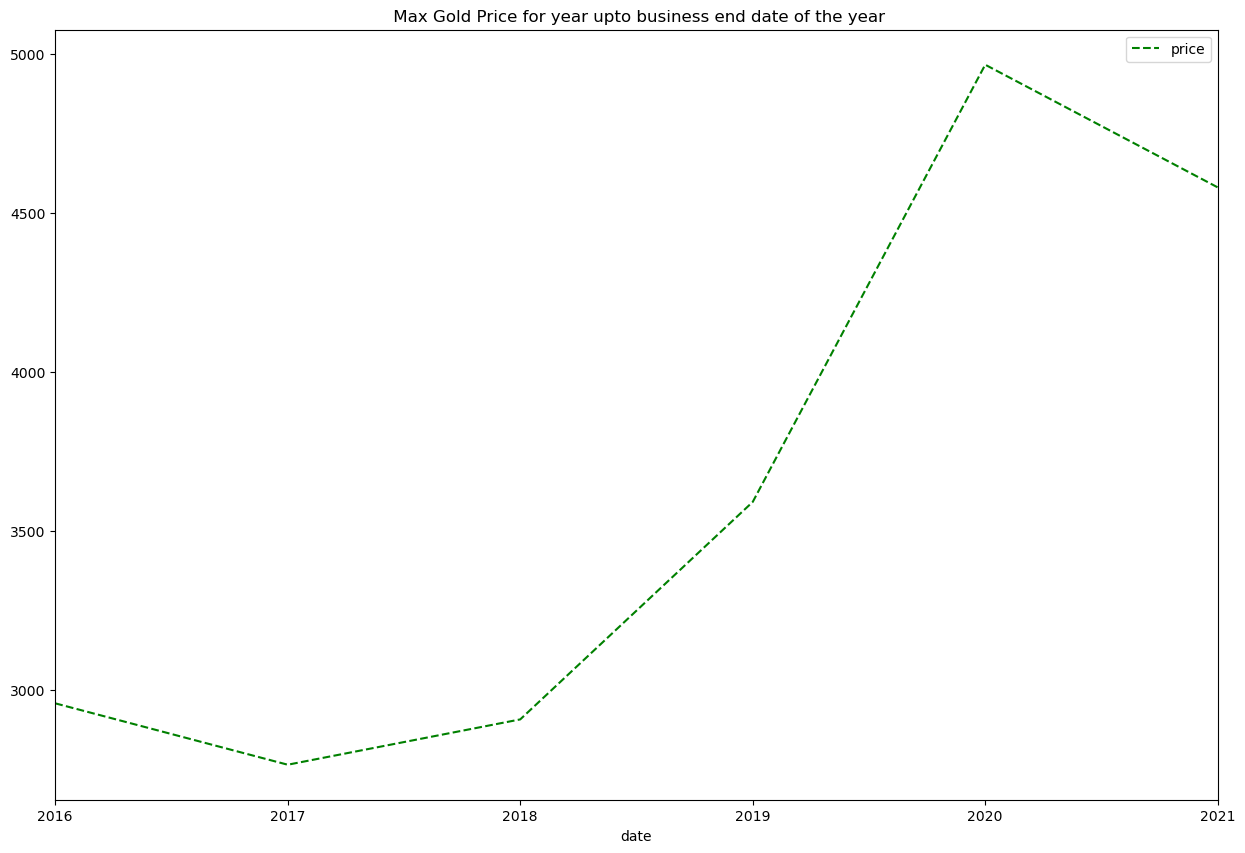

In [22]:
gold_prices_excelR.resample('BA').max().plot(figsize=(15,10),ls='--',c='g')
plt.title(" Max Gold Price for year upto business end date of the year")
plt.show()

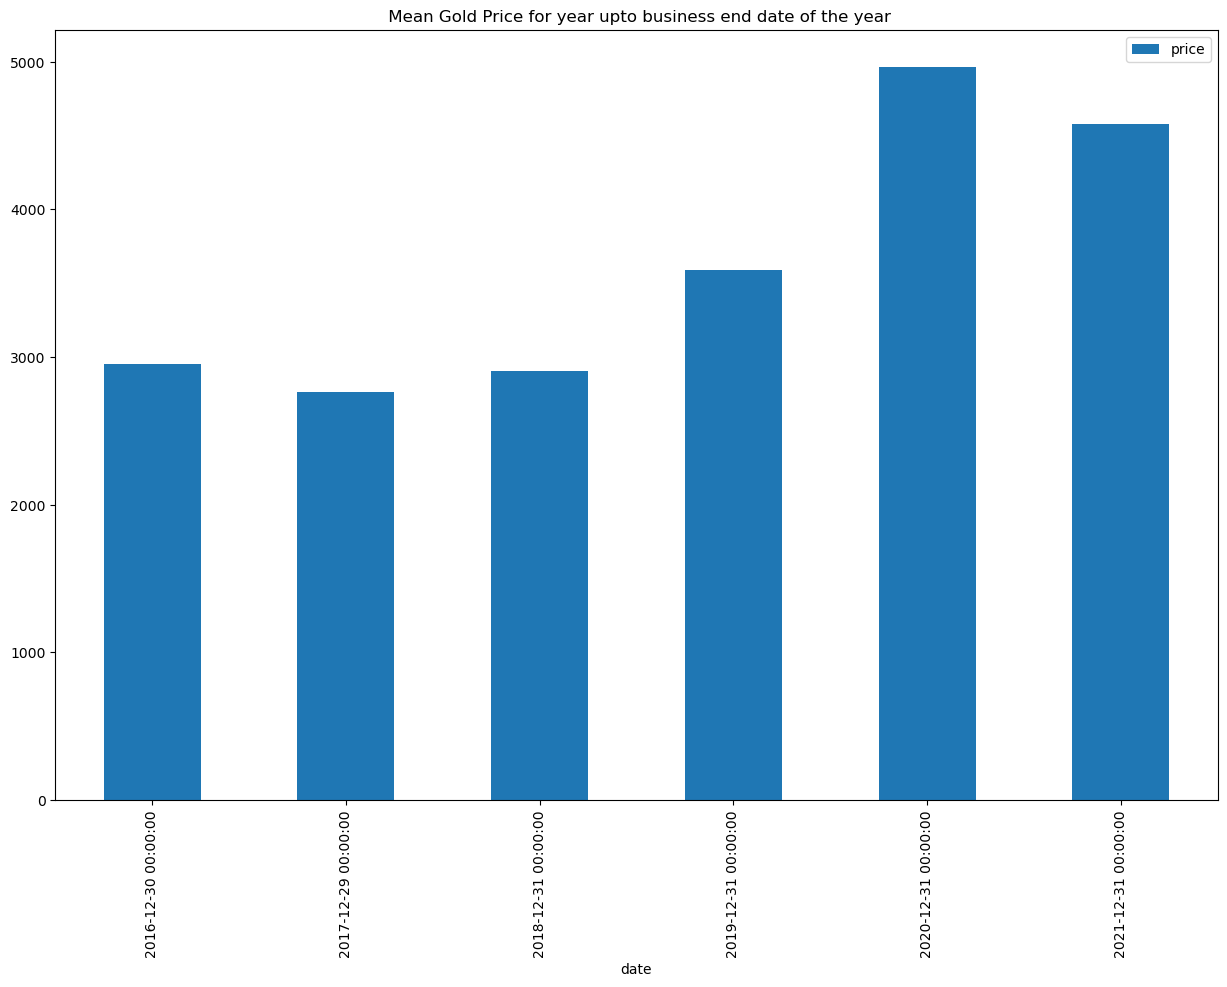

In [23]:
gold_prices_excelR.resample('BA').max().plot(figsize=(15,10),kind = 'bar')
plt.title(" Mean Gold Price for year upto business end date of the year")
plt.show()

In [24]:
gold_price = gold_prices_excelR.copy()
gold_price['TDMP']= gold_prices_excelR.rolling(30).mean() # thirty day mean price rolling
gold_price.tail()

,price,TDMP
date,,
2021-12-17,4394.4,4313.400000
2021-12-18,4389.5,4312.273333
2021-12-19,4389.5,4311.586667
2021-12-20,4354.1,4309.916667
2021-12-21,4346.5,4307.993333


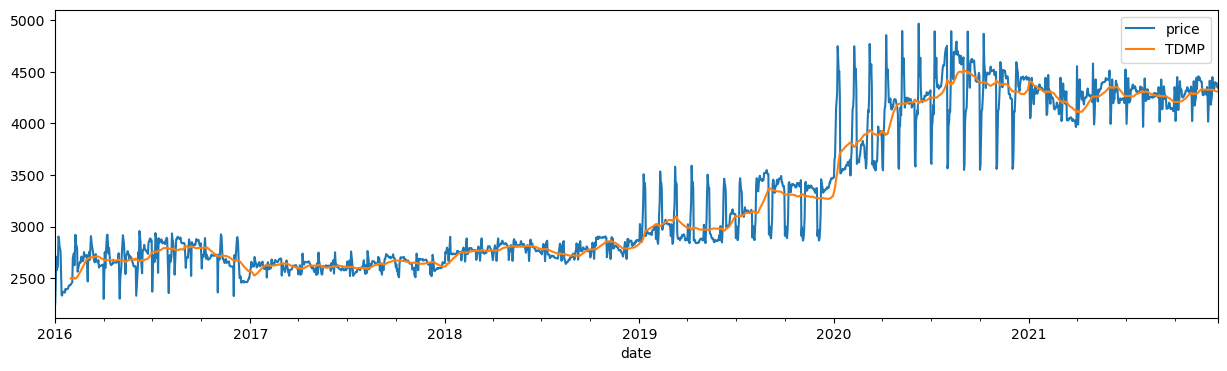

In [25]:
gold_price[['price','TDMP']].plot(figsize = (15,4))
plt.show()

In [26]:
gold_price['TDMinP']= gold_prices_excelR.rolling(30).min() # thirty day minimum price rolling
gold_price.tail()

,price,TDMP,TDMinP
date,,,
2021-12-17,4394.4,4313.400000,4017.1
2021-12-18,4389.5,4312.273333,4017.1
2021-12-19,4389.5,4311.586667,4017.1
2021-12-20,4354.1,4309.916667,4017.1
2021-12-21,4346.5,4307.993333,4017.1


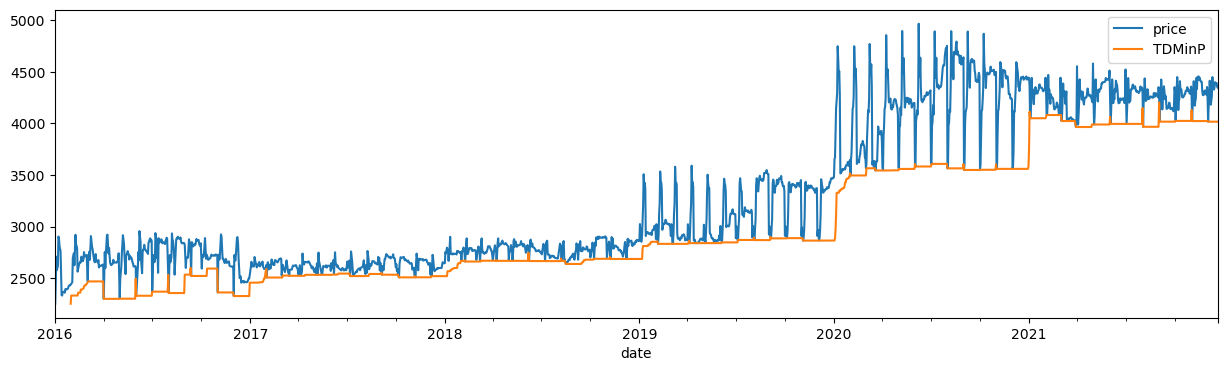

In [27]:
gold_price[['price','TDMinP']].plot(figsize = (15,4))
plt.show()

In [28]:
gold_price['TDMaxP']= gold_prices_excelR.rolling(30).max() # thirty day maximum price rolling
gold_price.tail()

,price,TDMP,TDMinP,TDMaxP
date,,,,
2021-12-17,4394.4,4313.400000,4017.1,4448.9
2021-12-18,4389.5,4312.273333,4017.1,4448.9
2021-12-19,4389.5,4311.586667,4017.1,4448.9
2021-12-20,4354.1,4309.916667,4017.1,4448.9
2021-12-21,4346.5,4307.993333,4017.1,4448.9


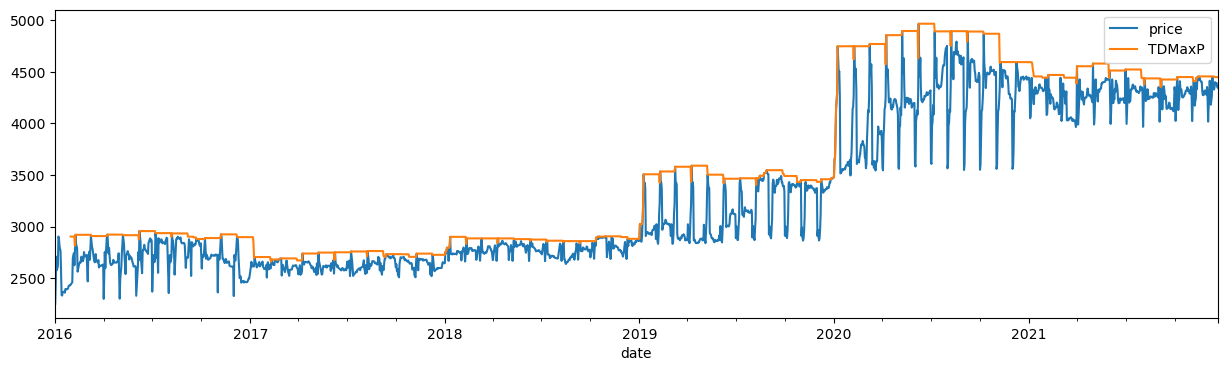

In [29]:
gold_price[['price','TDMaxP']].plot(figsize = (15,4))
plt.show()

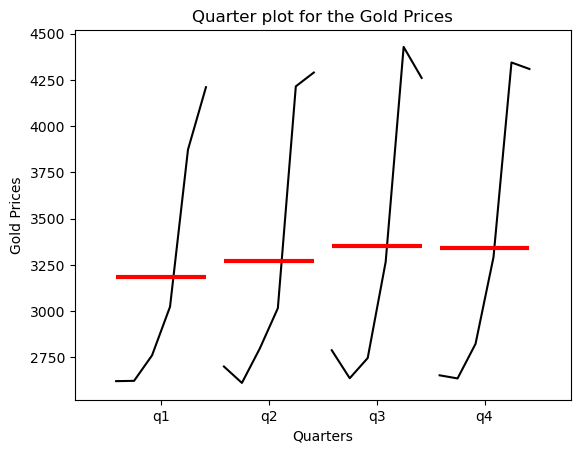

In [30]:
from statsmodels.graphics.tsaplots import quarter_plot
df_quarterly_gold_price = gold_prices_excelR.resample('Q').mean()
quarter_plot(df_quarterly_gold_price)
plt.title("Quarter plot for the Gold Prices")
plt.xlabel("Quarters")
plt.ylabel("Gold Prices")
plt.show()

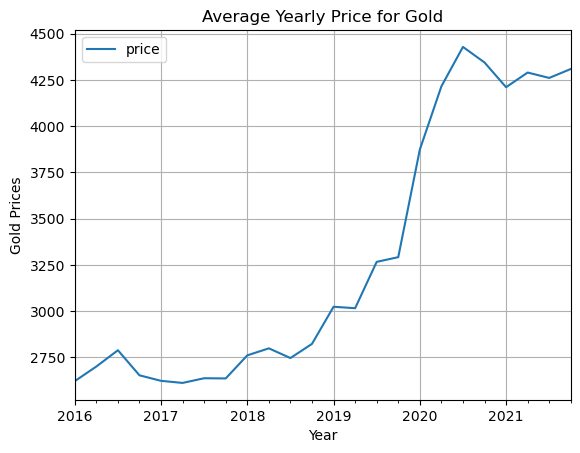

In [31]:
df_yearly_gold_price = gold_prices_excelR.resample('A').mean()
df_quarterly_gold_price.plot()
plt.title("Average Yearly Price for Gold")
plt.xlabel("Year")
plt.ylabel("Gold Prices")
plt.grid()

### ETS(Error-Trend-Seasonality) decomposition of the data

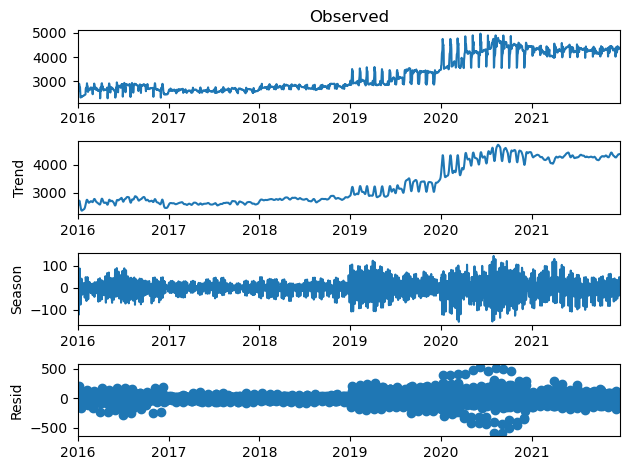

In [32]:
df = STL(gold_prices_excelR).fit()
df.plot()
plt.show()

## Data Exploration of Self Extracted Data 

In [ ]:
gold_prices_self = pd.read_csv(r"C:\radha\GitHub\Gold-Price-Prediction\Gold_Price_in_India_for_Project_self.csv")
gold_prices_self.head()

In [ ]:
gold_prices_self.info()

In [ ]:
gold_prices_self.isnull().sum()

In [ ]:
gold_prices_self[gold_prices_self.duplicated()]